In [1]:
import numpy as np
from astropy.table import Table, join, MaskedColumn, vstack
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
from astropy.time import Time
import pandas as pd
import re
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
from math import e
from math import pi
from astropy.table import Column
from math import sqrt
import numpy as np
#import emcee
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import math
import corner
from numpy import exp
from scipy import integrate
from scipy.integrate import quad
import pdb
import powerlaw
import random
from scipy import stats
from scipy.optimize import curve_fit
import scipy.optimize as opt
import statsmodels 
from multiprocessing import Pool
from scipy.signal import find_peaks
from statsmodels.graphics.tsaplots import plot_acf
import glob
import lightkurve as lk
import numpy as np
import pandas as pd
from astropy.stats import LombScargle
import imageio
from scipy.signal import argrelextrema

import glob
import lightkurve as lk
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from astropy.table import Table
import imageio
from lightkurve.correctors import RegressionCorrector
from lightkurve.correctors import DesignMatrix
from matplotlib import gridspec

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use('seaborn-white')



In [2]:
def circle_aperture(data,bkg,radius,PERCENTILE):
    radius_in_pixels=degs_to_pixels(radius)
    data_mask = np.zeros_like(data)
    x_len=np.shape(data_mask)[1]
    y_len=np.shape(data_mask)[2]
    #centers
    cen_x=x_len//2
    cen_y=y_len//2
    bkg_mask = np.zeros_like(bkg)
    bkg_cutoff = getUpperLimit(bkg,PERCENTILE)
    for i in range(x_len):
        for j in range(y_len):
            if (i-cen_x)**2+(j-cen_y)**2<(radius_in_pixels)**2:# star mask condition
                data_mask[0,i,j]=1
                
    x_len=np.shape(bkg_mask)[1]
    y_len=np.shape(bkg_mask)[2]
    cen_x=x_len//2
    cen_y=y_len//2
    for i in range(x_len):
        for j in range(y_len):
            if np.logical_and((i-cen_x)**2+(j-cen_y)**2>(radius_in_pixels)**2, bkg[0,i,j]<bkg_cutoff): # sky mask condition
                bkg_mask[0,i,j]=1            

    star_mask = data_mask==1
    sky_mask = bkg_mask==1
#     sky_mask_2 = bkg_mask_2==1
#     field_mask = field==1
    return star_mask,sky_mask# return masks

def degs_to_pixels(degs):
    return degs*60*60/21 #convert degrees to arcsecs and then divide by the resolution of TESS (21 arcsec per pixel)

def pixels_to_degs(pixels):
    return pixels*21/(60*60) #convert degrees to arcsecs and then divide by the resolution of TESS (21 arcsec per pixel)

UPPER_LIMIT_METHOD = 1
PERCENTILE = 85

def getUpperLimit(dataDistribution,PERCENTILE):
    if UPPER_LIMIT_METHOD == 1:
        return np.nanpercentile(dataDistribution, PERCENTILE)
    
    elif UPPER_LIMIT_METHOD == 2:
        hist = np.histogram(dataDistribution, bins=BINS, range=(0, 3000))# Bin the data
        return hist[1][np.argmax(hist[0])]# Return the flux corresponding to the most populated bin
    
    elif UPPER_LIMIT_METHOD == 3:
        pass
    
    elif UPPER_LIMIT_METHOD == 4:
        numMaxima = countMaxima(tpfs[i][frame].flux.reshape((cutout_size, cutout_size)))
        numPixels = np.count_nonzero(~np.isnan(tpfs[i][frame].flux))
        return np.nanpercentile(dataDistribution, 100 - numMaxima / numPixels * 100)
        
    else:
        return 150

NGC 7790 has 2 results.


/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
No handles with labels found to put in legend.
/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
100%|██████████| 99/99 [12:47<00:00,  7.76s/it]


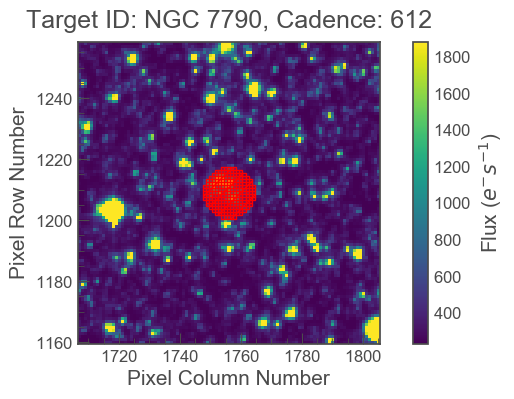

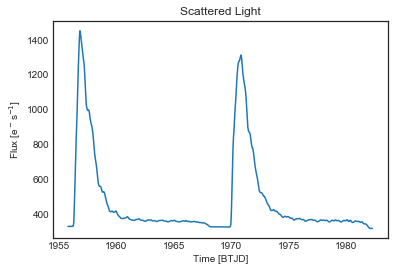

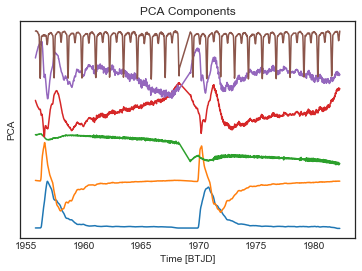

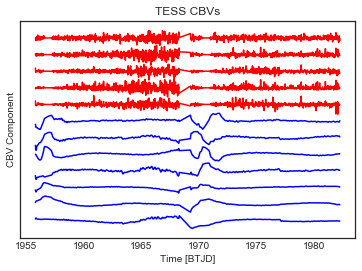

In [3]:
cutout_size=99

search = lk.search_tesscut('NGC 7790')#search for the cluster in TESS using lightkurve
char = ""
if len(search) != 1: char = "s"
print("{0} has {1} result{2}.".format('NGC 7790', len(search), char))

tpf1 = lk.search_tesscut('NGC 7790')[1].download(cutout_size=(99, 99))

use_tpfs1=tpf1[np.where(tpf1.to_lightcurve().quality==0)]

star_mask1=np.empty([len(use_tpfs1),cutout_size,cutout_size],dtype='bool')
sky_mask1=np.empty([len(use_tpfs1),cutout_size,cutout_size],dtype='bool')

star_mask1[0],sky_mask1[0] = circle_aperture(use_tpfs1[0].flux.value, use_tpfs1[0].flux.value, 2.9/60, 85)

uncorrected_lc1 = use_tpfs1.to_lightcurve(aperture_mask=star_mask1[0])

keep_mask=star_mask1[0]

p = use_tpfs1.plot(frame=use_tpfs1.shape[0] // 2, aperture_mask=keep_mask)

# Time average of the pixels in the TPF:
max_frame1 = use_tpfs1.flux.value.max(axis=0)
# This renormalizes any columns which are bright because of straps on the detector
max_frame1 -= np.median(max_frame1, axis=0)
# This aperture is any "faint" pixels:
bkg_aper1 = max_frame1 < np.percentile(max_frame1, 85)
# The average light curve of the faint pixels is a good estimate of the scattered light
scattered_light1 = use_tpfs1.flux.value[:, bkg_aper1].mean(axis=1)

fig, ax = plt.subplots()
ax.plot(use_tpfs1.time.value, scattered_light1)
ax.set(title='Scattered Light', xlabel='Time [BTJD]', ylabel='Flux [e$^-$s$^{-1}$]');
fig.show()

pca_dm1 = lk.DesignMatrix(use_tpfs1.flux.value[:, bkg_aper1], name='PCA').pca(6) 
pca_dm1.prior_mu =np.array([np.median(uncorrected_lc1.flux.value) for i in range(6)])
pca_dm1.prior_sigma =np.array([(np.percentile(uncorrected_lc1.flux.value, 84) - np.percentile(uncorrected_lc1.flux.value, 16)) for i in range(6)])

#Changed this to 6 to be consistent with our previous analysis

# Time average of the pixels in the TPF:
fig2, ax = plt.subplots()
ax.plot(use_tpfs1.time.value, pca_dm1.X + np.arange(pca_dm1.shape[1]) * 0.1)
ax.set(title='PCA Components', xlabel='Time [BTJD]', ylabel='PCA', yticks=[]);
fig2.show()

cbvs_1_1 = lk.correctors.cbvcorrector.download_tess_cbvs(sector=use_tpfs1.sector, camera=use_tpfs1.camera, ccd=use_tpfs1.ccd, cbv_type='MultiScale', band=2).interpolate(use_tpfs1.to_lightcurve())
cbvs_2_1 = lk.correctors.cbvcorrector.download_tess_cbvs(sector=use_tpfs1.sector, camera=use_tpfs1.camera, ccd=use_tpfs1.ccd, cbv_type='MultiScale', band=3).interpolate(use_tpfs1.to_lightcurve())

# This converts the CBVs into a `designmatrix` object for us to use later.
# You can change `indices` to tune the number of CBVs to use.
cbv_dm1_1 = cbvs_1_1.to_designmatrix(cbv_indices=np.arange(1, 8))
cbv_dm2_1 = cbvs_2_1.to_designmatrix(cbv_indices=np.arange(1, 8))

# This combines the different timescale CBVs into a single `designmatrix` object
cbv_dm1 = lk.DesignMatrixCollection([cbv_dm1_1, cbv_dm2_1]).to_designmatrix()

fig3, ax = plt.subplots()
ax.plot(use_tpfs1.time.value, cbv_dm1_1.X + np.arange(cbv_dm1_1.shape[1]) * 0.05, c='b')
ax.plot(use_tpfs1.time.value, cbv_dm2_1.X + (np.arange(cbv_dm2_1.shape[1]) + cbv_dm1_1.shape[1]) * 0.05, c='r')
ax.set(title='TESS CBVs', xlabel='Time [BTJD]', ylabel='CBV Component', yticks=[]);
plt.legend()
fig3.show()

spline_dm1 = lk.designmatrix.create_spline_matrix(use_tpfs1.time.value, n_knots=4)
spline_dm1.prior_mu = np.array([np.median(uncorrected_lc1.flux.value) for i in range(4)])
spline_dm1.prior_sigma = np.array([(np.percentile(uncorrected_lc1.flux.value, 84) - np.percentile(uncorrected_lc1.flux.value, 16)) for i in range(4)])

dm1 = lk.DesignMatrixCollection([pca_dm1,
                                 cbv_dm1,
                                 spline_dm1,
                                 ])

full_model1, systematics_model1, full_model_Normalized = np.ones((3, *use_tpfs1.shape))
for idx in tqdm(range(use_tpfs1.shape[1])):
    for jdx in range(use_tpfs1.shape[2]):
        pixel_lightcurve1 = lk.LightCurve(time=use_tpfs1.time.value, flux=use_tpfs1.flux.value[:, idx, jdx], flux_err=use_tpfs1.flux_err.value[:, idx, jdx])
        r1 = lk.RegressionCorrector(pixel_lightcurve1)
        # Correct the pixel light curve by our design matrix
        r1.correct(dm1)
        # Extract just the systematics components
        systematics_model1[:, idx, jdx] = (r1.diagnostic_lightcurves['PCA'].flux.value +
                                           r1.diagnostic_lightcurves['CBVs'].flux.value)
        # Add all the components
        full_model1[:, idx, jdx] =  (r1.diagnostic_lightcurves['PCA'].flux.value +
                                     r1.diagnostic_lightcurves['CBVs'].flux.value +
                                     r1.diagnostic_lightcurves['spline'].flux.value)
        #Making this not normalized
        full_model1[:, idx, jdx] -= r1.diagnostic_lightcurves['spline'].flux.value.mean()
        
        #Making Normalized Model For the Test of Scattered Light
        full_model_Normalized[:, idx, jdx] =  (r1.diagnostic_lightcurves['PCA'].flux.value +

                                                r1.diagnostic_lightcurves['CBVs'].flux.value +

                                                r1.diagnostic_lightcurves['spline'].flux.value) 

scattered_light_model_correected_lightcurve1=(use_tpfs1 - scattered_light1[:, None, None]).to_lightcurve(aperture_mask=star_mask1[0])
systematics_model_corrected_lightcurve1=(use_tpfs1 - systematics_model1).to_lightcurve(aperture_mask=star_mask1[0])
full_corrected_lightcurve1=(use_tpfs1 - full_model1).to_lightcurve(aperture_mask=keep_mask)





In [4]:
#calculate the lomb-scargle periodogram for the ensemble corrected LC for a range frequencies
t = full_corrected_lightcurve1[full_corrected_lightcurve1.quality == 0].time.value
dy = full_corrected_lightcurve1[full_corrected_lightcurve1.quality == 0].flux_err.value
y = full_corrected_lightcurve1[full_corrected_lightcurve1.quality == 0].flux.value
omega=np.arange(0.05,11,0.01)
P_LS = LombScargle(t, y, dy=dy).power(omega)# LS power

In [5]:
lightcurves=[]

for i in range(len(np.where(keep_mask)[0])):
    
    pixel_mask=np.zeros([len(np.where(keep_mask)[0]),cutout_size,cutout_size],dtype='bool')
    pixel_loc=np.where(keep_mask)[0][i],np.where(keep_mask)[1][i]
    pixel_mask[i][pixel_loc]=True
   
    lightcurves.append(use_tpfs1.to_lightcurve(aperture_mask=pixel_mask[i]))
    

In [6]:
correctors = [RegressionCorrector(lc) for lc in lightcurves]

correctedLCs = [correctors[i].correct(dm1) for i in range(len(correctors))] 

In [7]:
for i in range(len(correctedLCs)):   
    correctedLCs[i].to_csv('Selected_CO_pixels/corrected_LCs_pixel_no.{0}'.format(i), overwrite=True)


In [8]:
pixel_loc_write=[]
P_LS_pixel=[]
omega=np.arange(0.05,11,0.01)

for i in range(len(np.where(keep_mask)[0])):  
    pixel_loc=np.where(keep_mask)[0][i],np.where(keep_mask)[1][i]
    
    cor_lc=pd.read_csv('Selected_CO_pixels/corrected_LCs_pixel_no.{0}'.format(i))
    
    t = cor_lc['time']
    dy = cor_lc['flux_err']
    y = cor_lc['flux']
    P_LS_pixel.append(LombScargle(t, y, dy=dy).power(omega))# calculate and save the LS periodogram power
    pixel_loc_write.append(pixel_loc)#save the pixel location


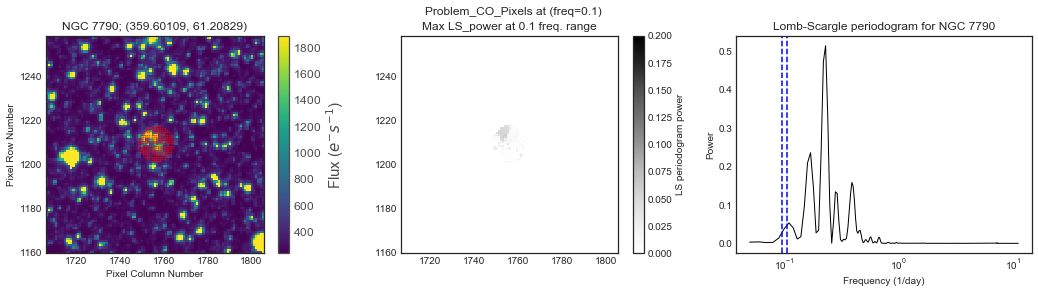

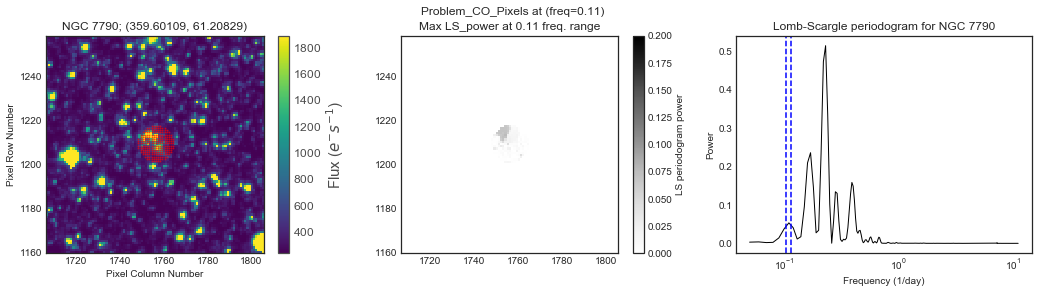

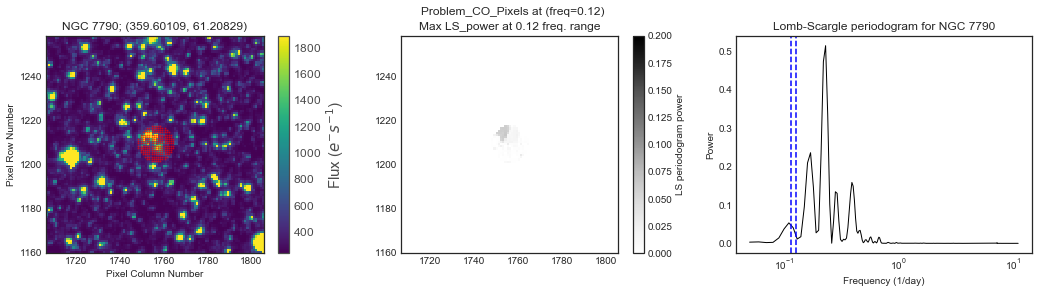

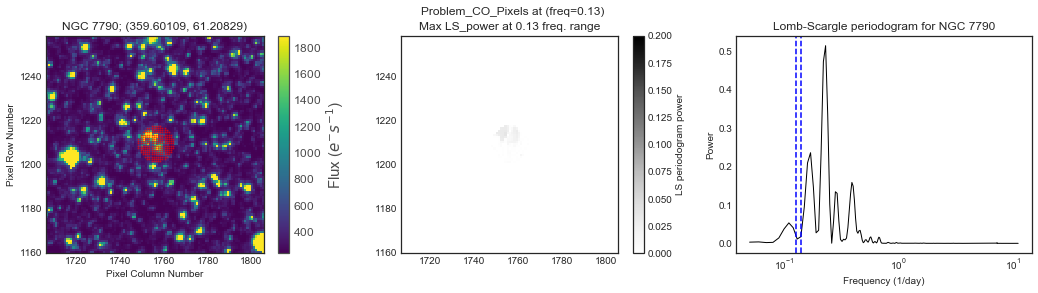

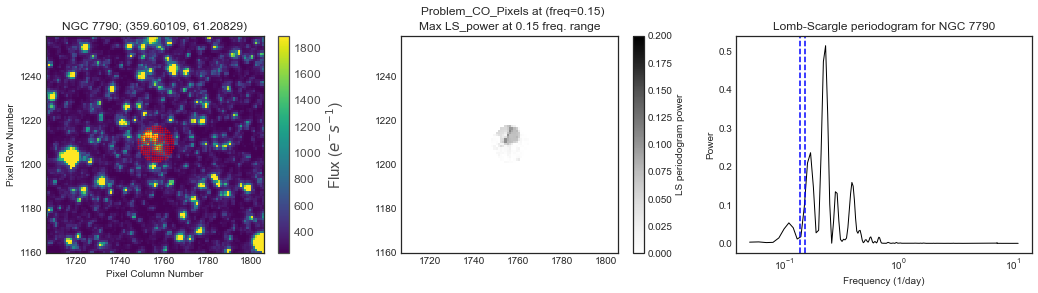

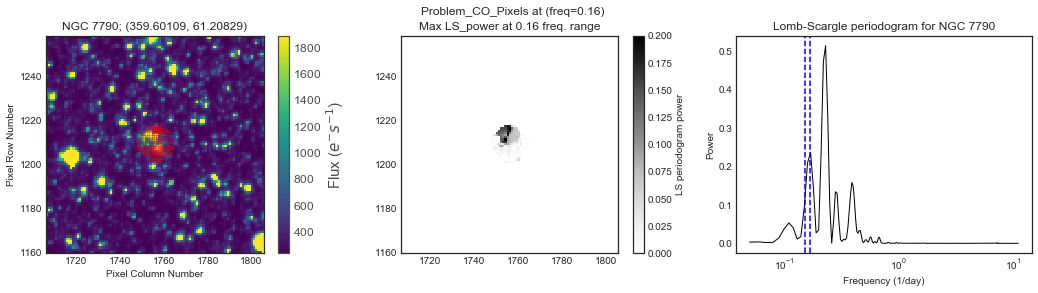

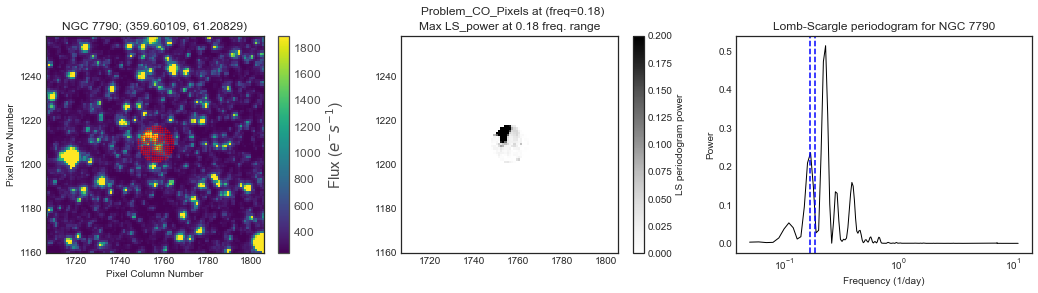

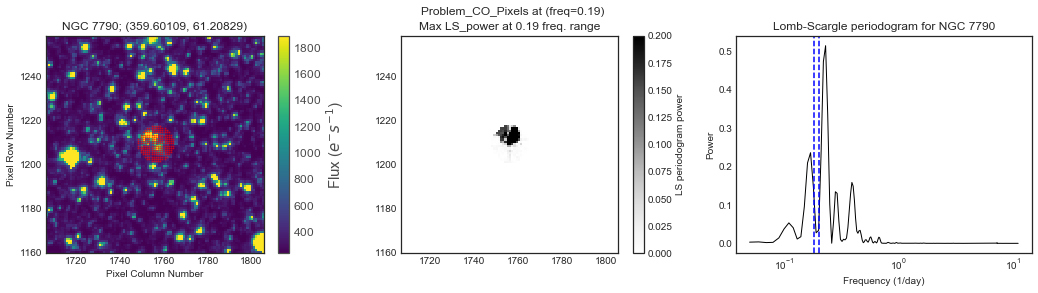

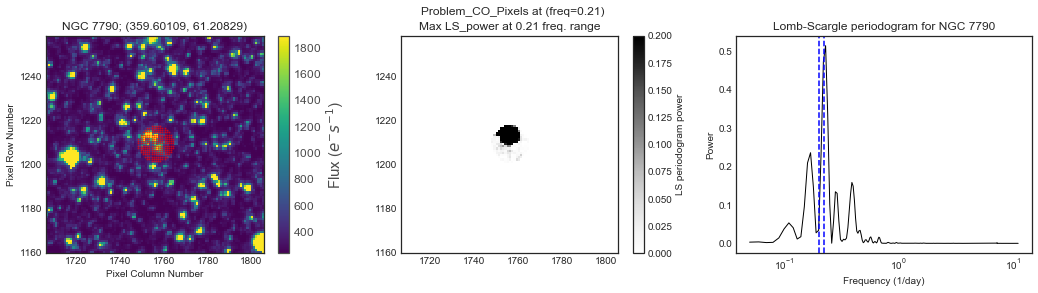

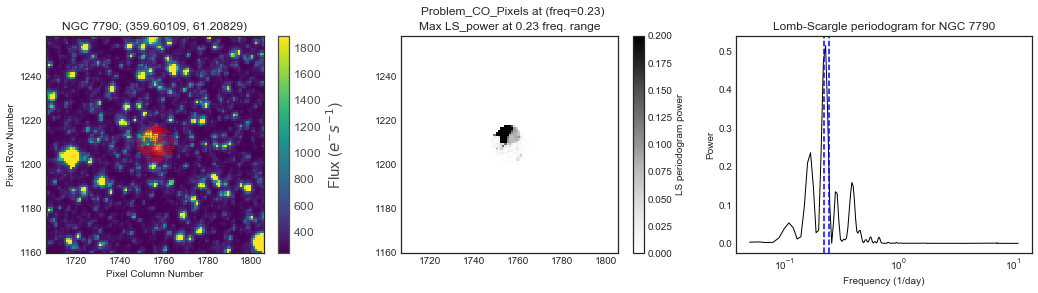

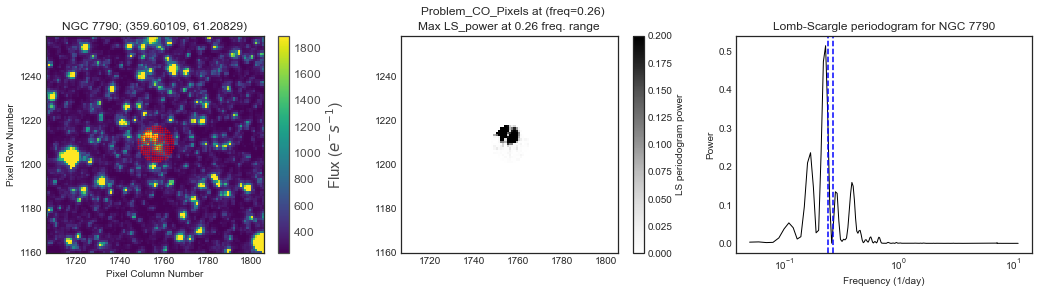

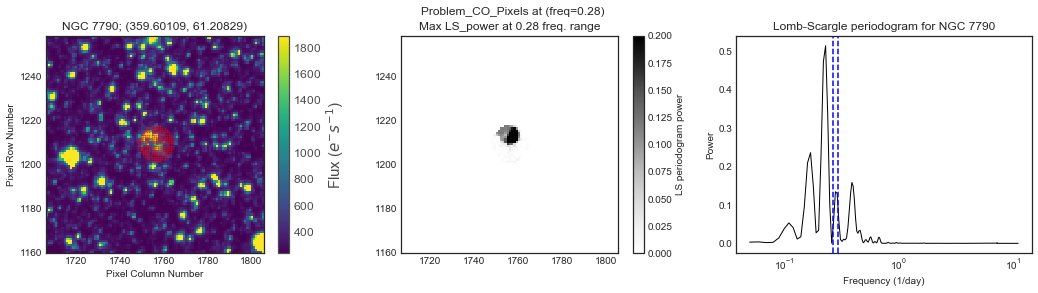

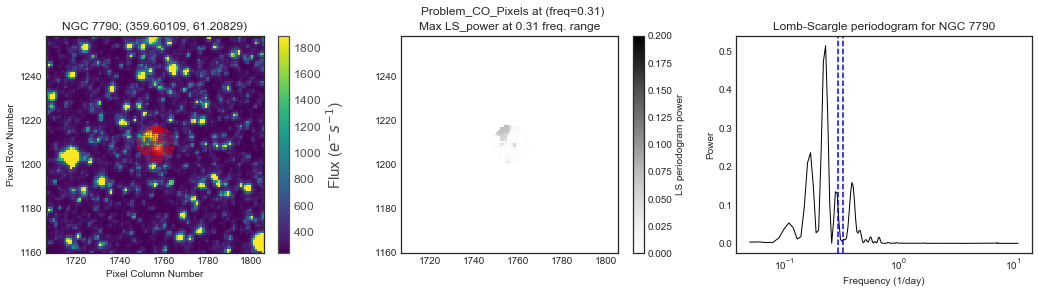

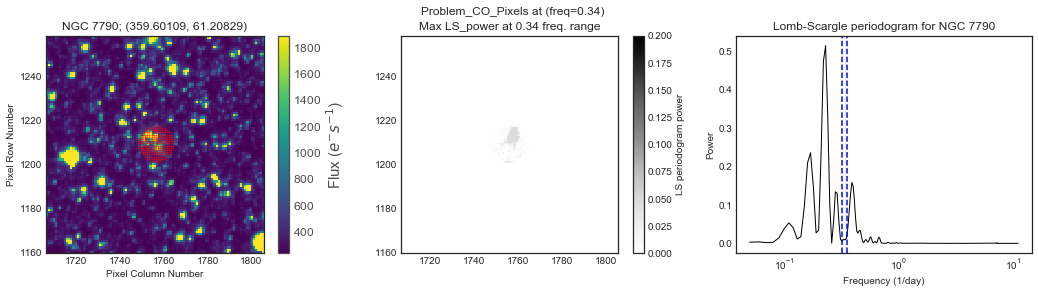

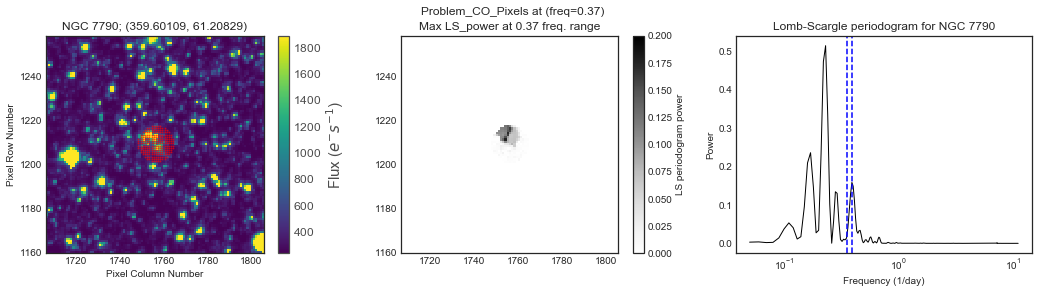

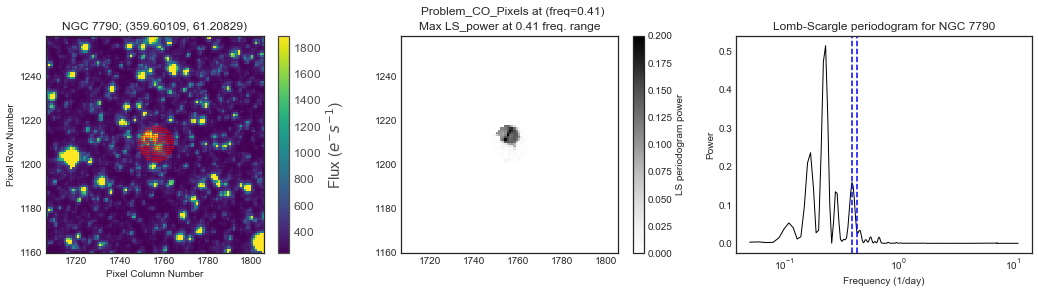

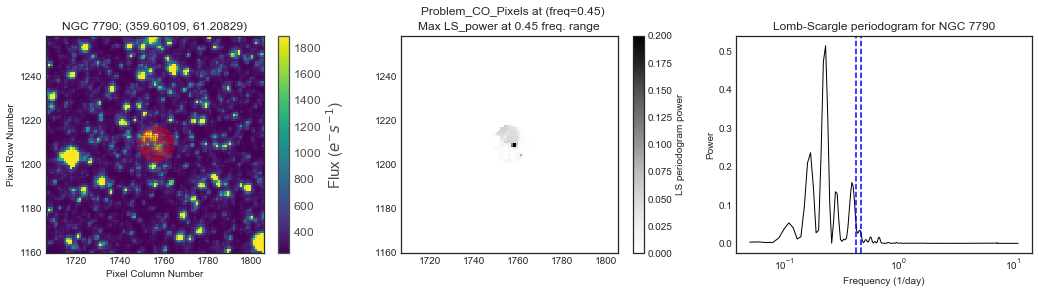

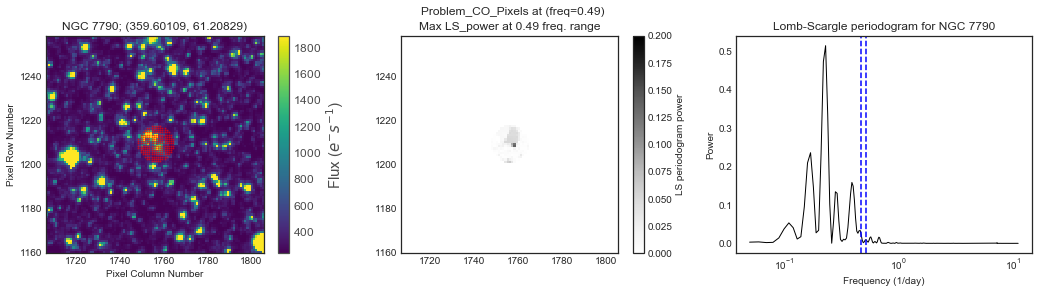

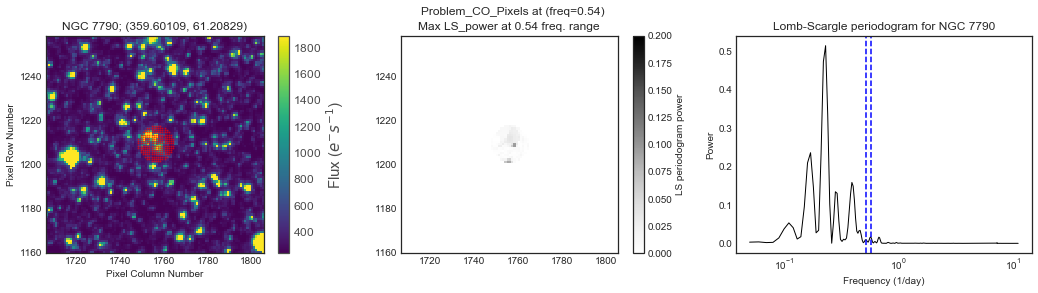

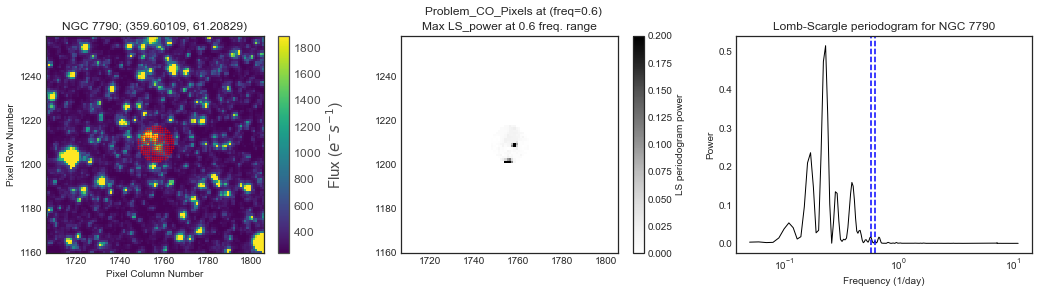

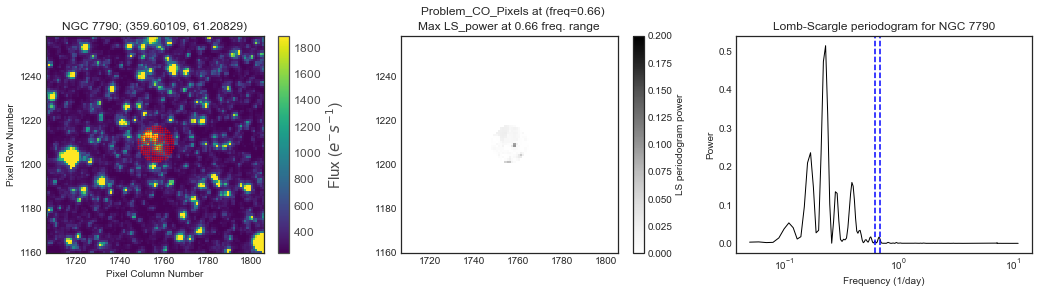

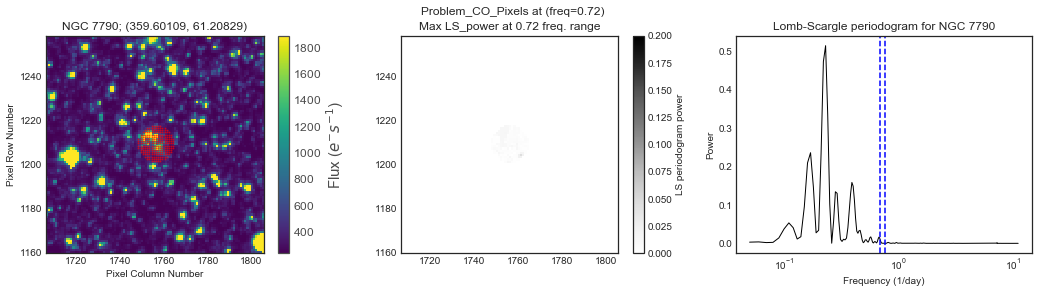

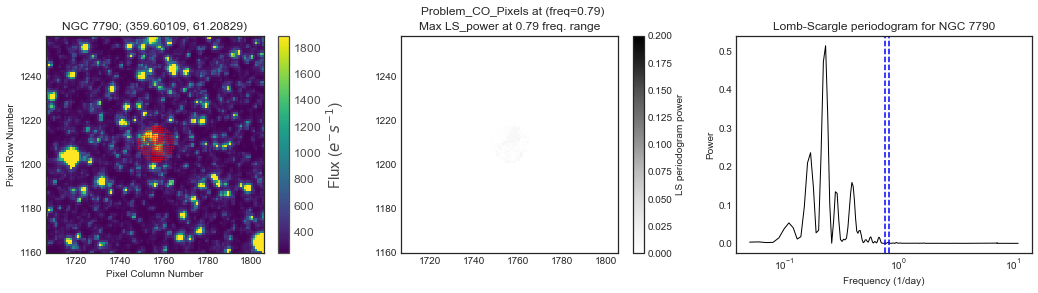

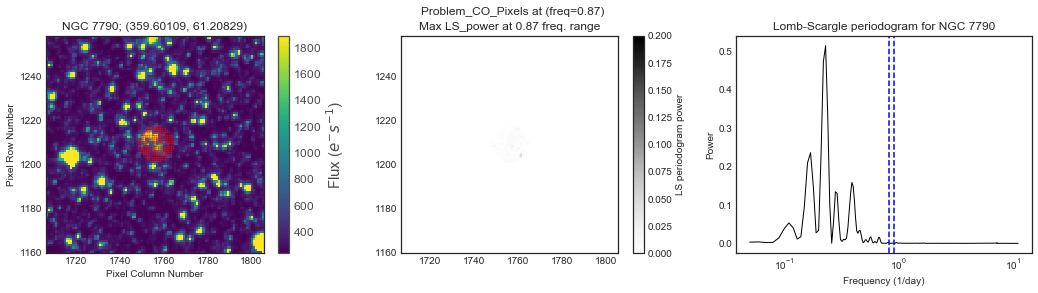

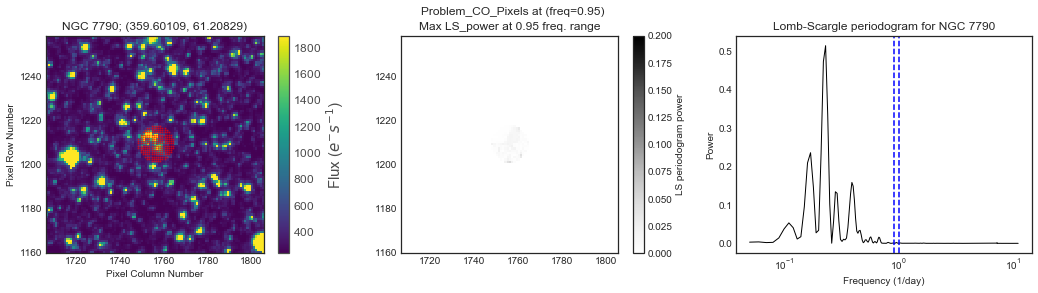

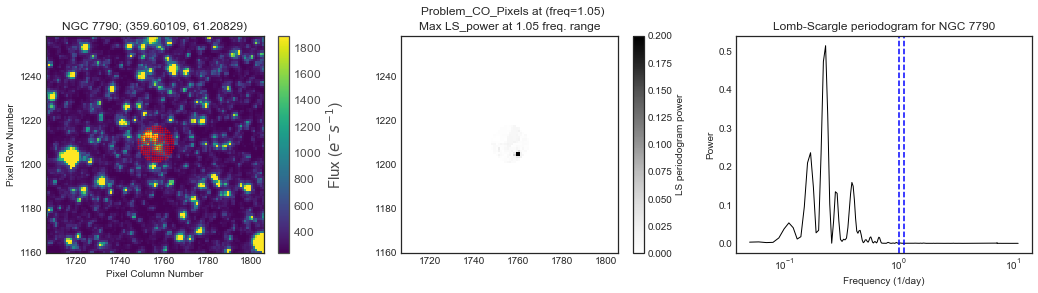

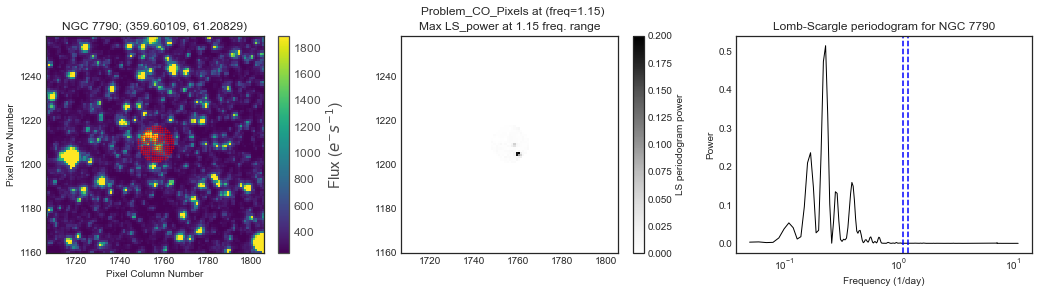

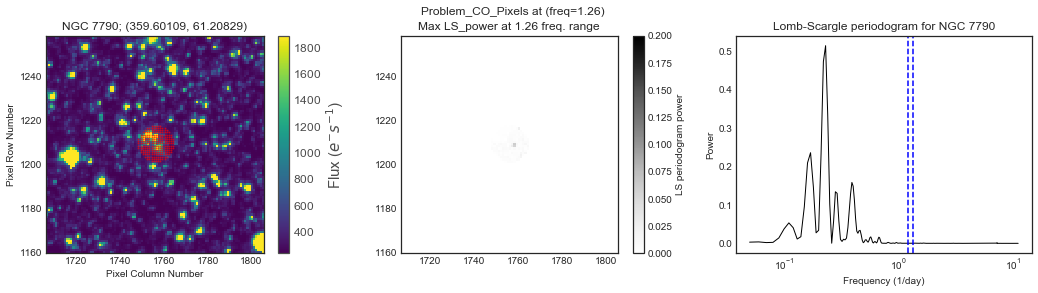

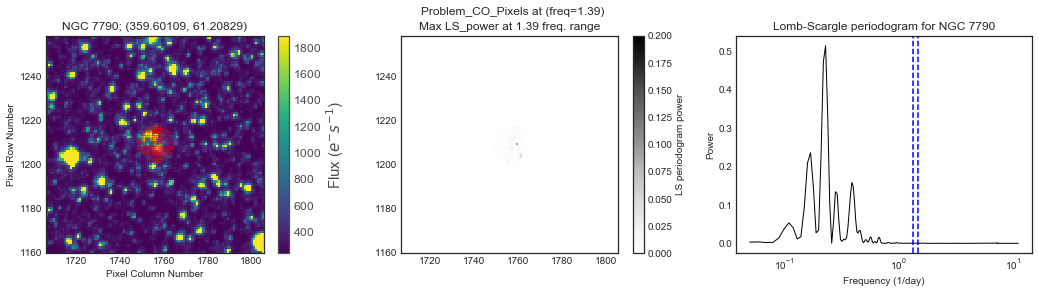

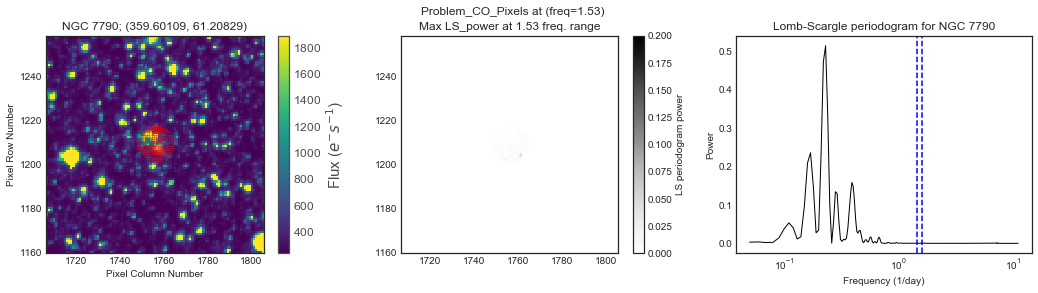

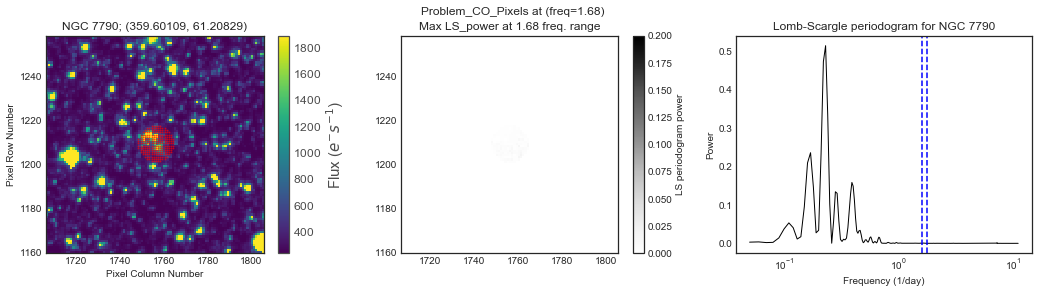

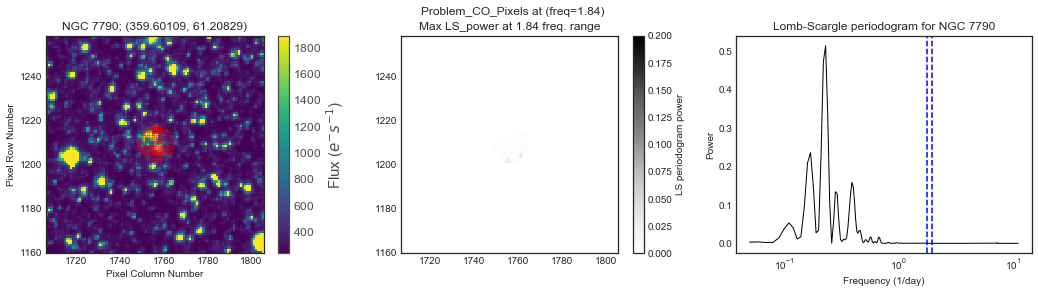

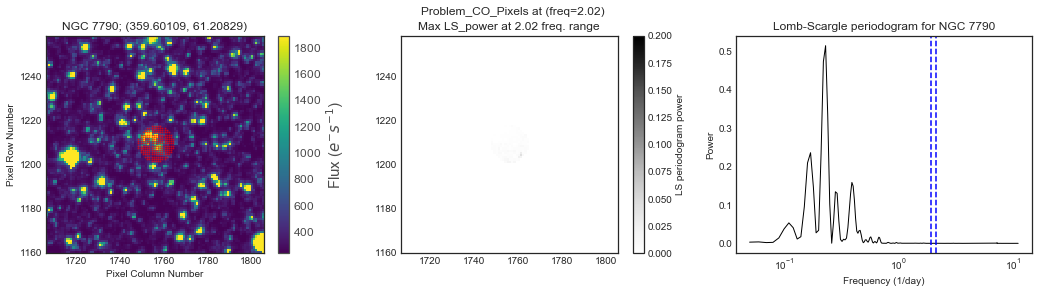

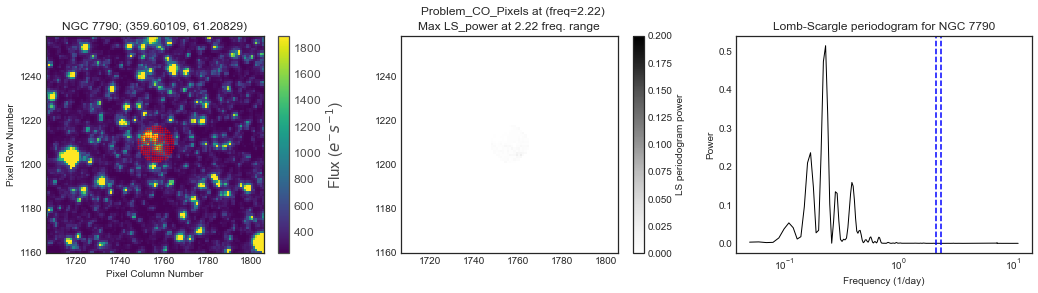

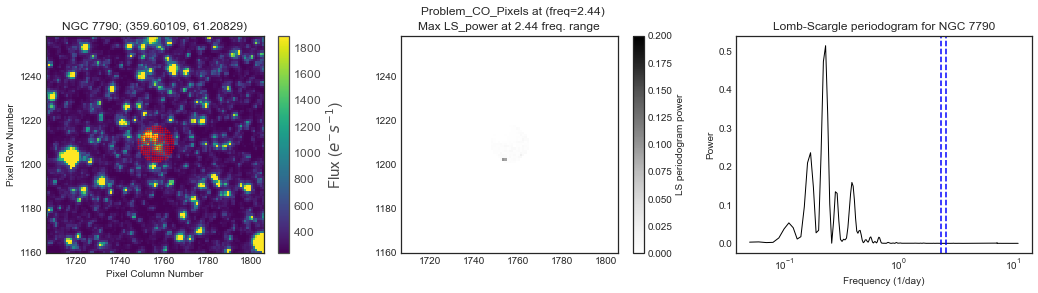

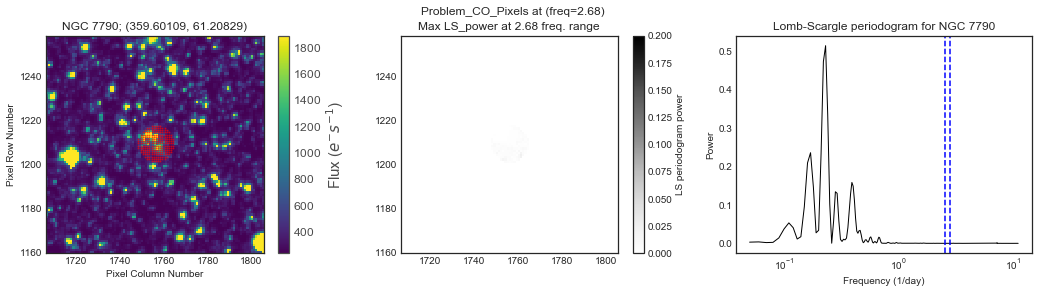

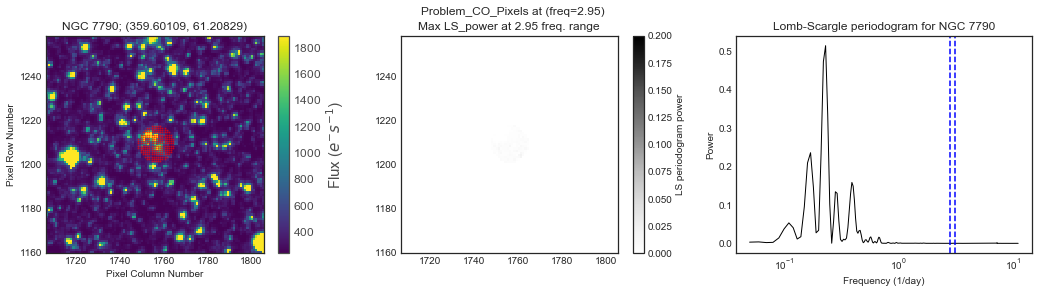

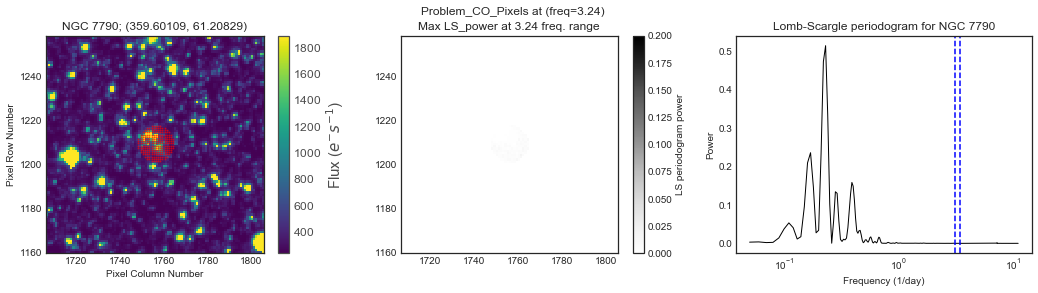

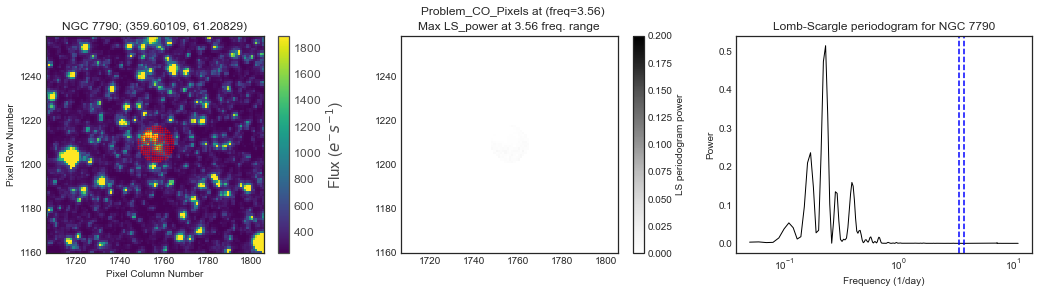

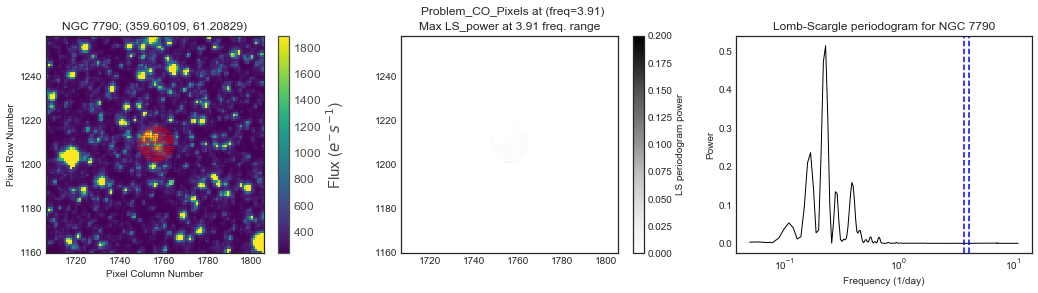

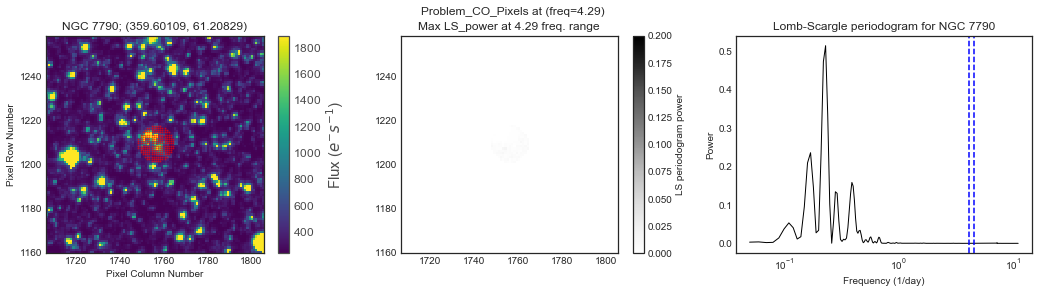

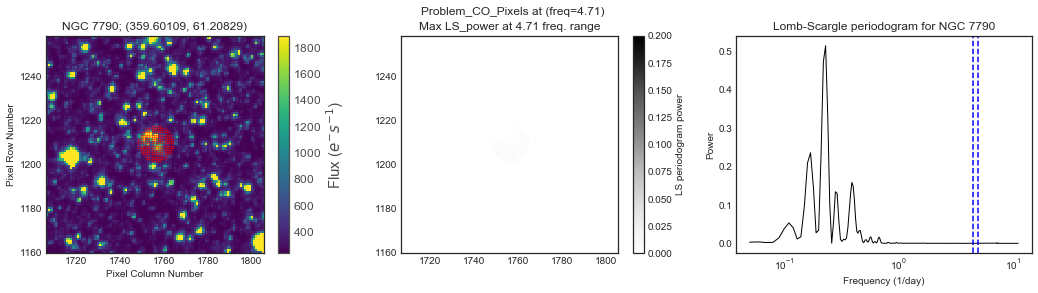

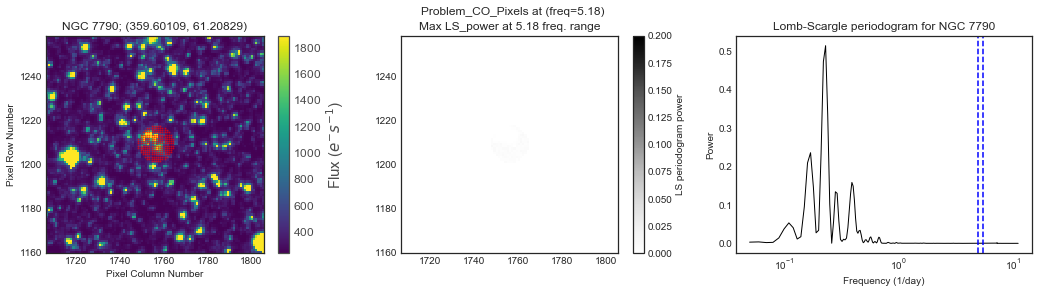

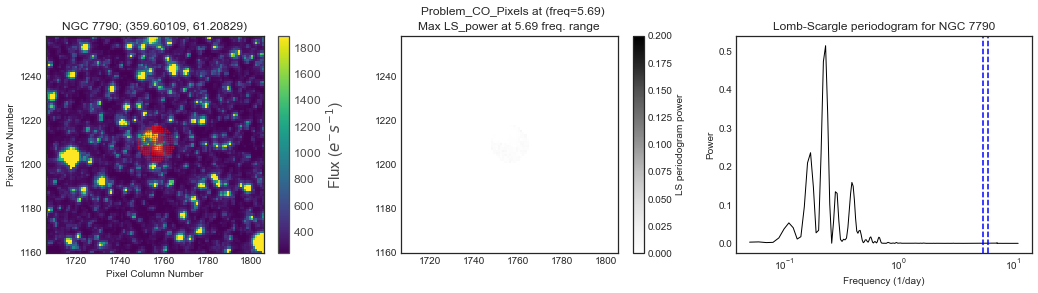

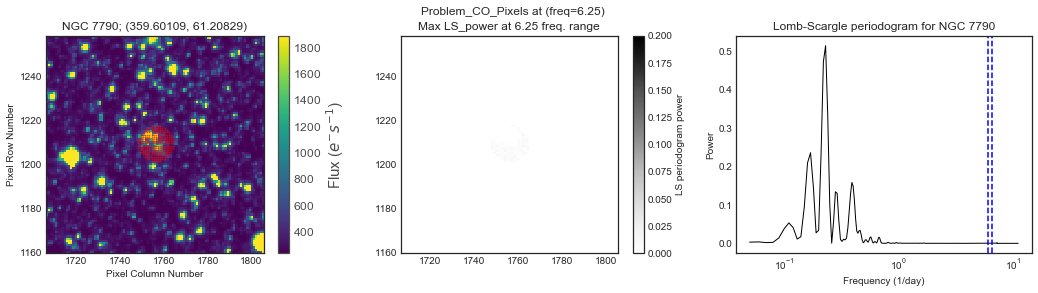

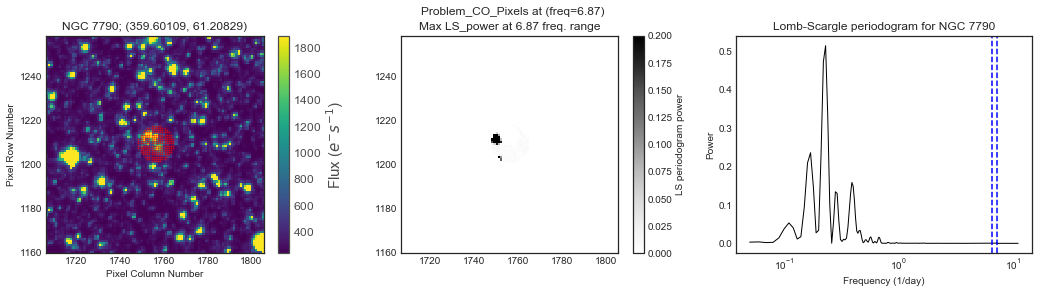

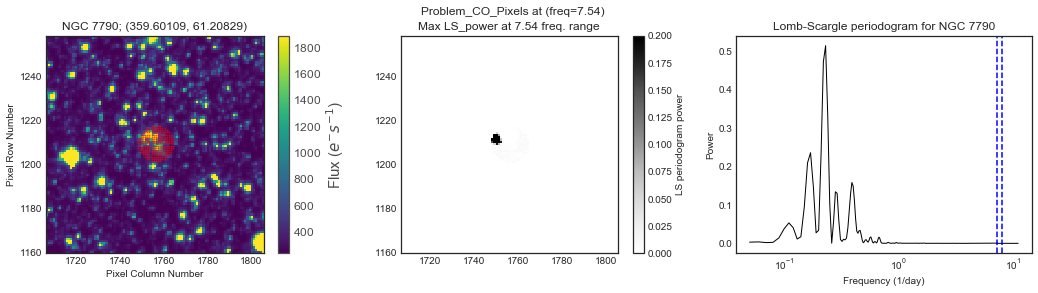

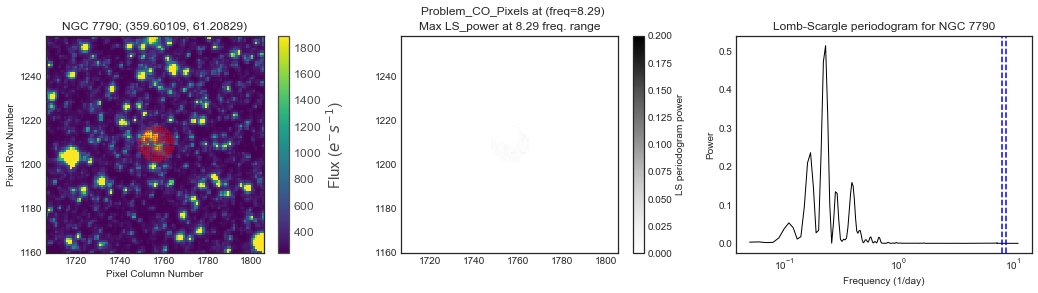

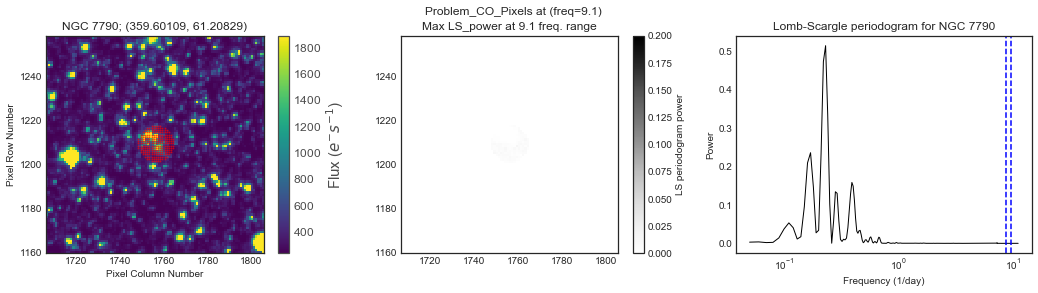

In [9]:
#define the frequency range to iterate over in log space
l_of_LIT_PIX=[]
median_lsp_power_for_freq_range=[]

CLUSTERS=['NGC 7790']

freq_bin_centers=np.logspace(-1, 1, num=50)
for freq_index in range(len(freq_bin_centers)-1):#iterate over the frequency range except for the last point
    freq_range = freq_bin_centers[freq_index+1]-freq_bin_centers[freq_index]# select a range of frequencies to search pixel power in
    
    fig, (ax1, ax2, ax3)=plt.subplots(ncols = 3, figsize=(18,4))#initialize plot parameters
    p = use_tpfs1.plot(frame=use_tpfs1.shape[0] // 2,ax=ax1)# plot of the flux in the cutout
    a = plt.Circle((ax1.get_xlim()[0]+(ax1.get_xlim()[1]-ax1.get_xlim()[0])/2, ax1.get_ylim()[0]+(ax1.get_ylim()[1]-ax1.get_ylim()[0])/2), 50, color='b', fill=False, linestyle='--')# circle of the cluster radius
    ax2.imshow(keep_mask,extent=list(ax1.get_xlim())+list(ax1.get_ylim()), origin = 'lower' , cmap = 'Reds', alpha = 0.5, label = 'Star')
#    ax2.add_patch(a)# add circle
    
    max_power=np.zeros([len(use_tpfs1),cutout_size,cutout_size],dtype='float64')
    pixel_loc_x_list=[]
    pixel_loc_y_list=[]
    max_power_list=[]
    for pixel_index in range(len(pixel_loc_write)):# iterate over the pixel locations
        pixel_loc_x_list.append(pixel_loc_write[pixel_index][1])
        pixel_loc_y_list.append(pixel_loc_write[pixel_index][0])
        max_power[0,pixel_loc_write[pixel_index][0],pixel_loc_write[pixel_index][1]] = np.max(P_LS_pixel[pixel_index][np.logical_and(freq_bin_centers[freq_index]-freq_range/2<omega, omega<freq_bin_centers[freq_index]+freq_range/2)]) # maximum of the periodogram power of the LC from this pixel within the frequency range being searched
    ax1.scatter(ax1.get_xlim()[0]+pixel_loc_x_list+1,ax1.get_ylim()[0]+pixel_loc_y_list+1,c='r', cmap='Greys',s = 1,alpha=0.5) # plot the positions of the pixels being looked at   
    im=ax2.imshow(max_power[0,:,:],extent=list(ax1.get_xlim())+list(ax1.get_ylim()), origin = 'lower', cmap='Greys', vmax=.2) # plot the max pixel power corresponding to each pixel
    l_of_LIT_PIX.append(max_power[np.where(max_power > .1)])
    # axes limits set depending on the cluster
#    ax1.set_xlim(60,95)
#    ax1.set_ylim(980,1015)
#    ax2.set_xlim(60,95)
#    ax2.set_ylim(980,1015)
    # axes adjustments
#    ax2.set_xticks(ax1.get_xticks())
#    ax2.set_yticks(ax1.get_yticks())
#    ax2.set_xlim(ax1.get_xlim())
#    ax2.set_ylim(ax1.get_ylim())
    ax2.set_title('Aperture (star pixels)')
    
    cbar = fig.colorbar(im,ax=ax2)#add colorbar
    ax1.set_title(CLUSTERS[0]+'; ('+str(use_tpfs1[0].ra)+', '+str(use_tpfs1[0].dec)+')')
    cbar.set_label('LS periodogram power')
    ax2.set_title('Max LS_power at {0} freq. range'.format(round(freq_bin_centers[freq_index],2)))

# plot the LS periodoram for the ensemble cluster LC
    ax3.plot(omega,P_LS,color='k',linewidth=1)
    ax3.axvline(freq_bin_centers[freq_index]-freq_range/2,color='b',linestyle='dashed')
    ax3.axvline(freq_bin_centers[freq_index]+freq_range/2,color='b',linestyle='dashed')
    ax3.set_xscale('log')
    ax3.set_xlabel('Frequency (1/day)')
    ax3.set_ylabel('Power')
    ax3.set_title('Lomb-Scargle periodogram for {0}'.format(CLUSTERS[0]))
    median_lsp_power_for_freq_range.append(P_LS[np.where(omega > freq_bin_centers[freq_index])][0])

    fig.suptitle('Problem_CO_Pixels at (freq={1})'.format(CLUSTERS[0],round(freq_bin_centers[freq_index],2)))
    fig.savefig('pixel_gif_plot/Pixels_for_Selected_CO:_gif_plots_(freq={0}).png'.format(round(freq_bin_centers[freq_index],2)))# save those plots
    plt.show()
    plt.close(fig)



In [10]:
## Make the gif using the individual plots ##

# set the gif destination path and the path to find the frames in
gif_path = "pixel_gif_plot/Selected_CO_pixel_power.gif"
frames_path = "pixel_gif_plot/Pixels_for_Selected_CO:_gif_plots_(freq={0}).png"
with imageio.get_writer(gif_path, mode='I',fps=1.5) as writer:# open gif writer
    for freq_index in range(len(freq_bin_centers)-1):# iterate over the frequencies
        writer.append_data(imageio.imread(frames_path.format(round(freq_bin_centers[freq_index],2))))#write the gif
        
        
        